#### Implementing AdaBoost using scikit library

In [9]:
from sklearn.ensemble import AdaBoostClassifier
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [75]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [76]:
X_train , X_test , y_train ,y_test = train_test_split(X , y, test_size=0.2 , random_state = 42)

In [16]:
clf = AdaBoostClassifier()

clf.fit(X_train , y_train)

y_pred = clf.predict(X_test)



In [17]:
print(f"Accuracy is {metrics.accuracy_score(y_pred , y_test)}")

Accuracy is 1.0


#### Use a different Base Learners

In [22]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()

ada = AdaBoostClassifier(estimator=gauss)

ada.fit(X_train , y_train)

y_pred = ada.predict(X_test)


In [23]:
print(f"Accuracy is {metrics.accuracy_score(y_pred , y_test)}")

Accuracy is 1.0


In [24]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

ada = AdaBoostClassifier(estimator=log)

ada.fit(X_train , y_train)

y_pred = ada.predict(X_test)


In [25]:
print(f"Accuracy is {metrics.accuracy_score(y_pred , y_test)}")

Accuracy is 0.9666666666666667


#### Making Synthetic Data

In [42]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

model = AdaBoostClassifier()

X, y = make_classification(n_samples=1000 , n_informative=15 , n_redundant=5 , random_state=42 , n_features=20)

cv = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=3)

n_scores = cross_val_score(model , X , y , scoring = "accuracy" , cv = cv , n_jobs= -1 , error_score="raise")

print(f"Mean is {mean(n_scores):.2f} and Standard deviation is {std(n_scores):.2f}")

Mean is 0.81 and Standard deviation is 0.03


In [48]:
model.fit(X,y)

row = [[ 2.4825477 ,  5.33328897, -0.9083723 , -2.30440308,  2.14957035,
       -1.12704206,  1.51310647,  0.05516024, -2.32440659, -2.08010276,
       -0.01265744,  2.88250102, -3.42867199, -2.80708089, -3.29485915,
       -4.89135836, -4.32496882, -2.70950144,  0.72359999,  0.45140537]]

y_hat = model.predict(row)
print(f"Predicted class is {y_hat}")

Predicted class is [1]


#### Using Logistic as Weak Learner

In [55]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

model = AdaBoostClassifier(estimator=log)

cv = RepeatedStratifiedKFold()

cv = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=3)

n_scores = cross_val_score(model , X , y , scoring = "accuracy" , cv = cv , n_jobs= -1 , error_score="raise")

print(f"Mean is {mean(n_scores):.2f} and Standard deviation is {std(n_scores):.2f}")

Mean is 0.81 and Standard deviation is 0.04


In [56]:
model.fit(X,y)

row = [[ 2.4825477 ,  5.33328897, -0.9083723 , -2.30440308,  2.14957035,
       -1.12704206,  1.51310647,  0.05516024, -2.32440659, -2.08010276,
       -0.01265744,  2.88250102, -3.42867199, -2.80708089, -3.29485915,
       -4.89135836, -4.32496882, -2.70950144,  0.72359999,  0.45140537]]

y_hat = model.predict(row)
print(f"Predicted class is {y_hat}")

Predicted class is [1]


#### AdaBoost Regressor

In [66]:
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RepeatedKFold

X , y = make_regression(n_samples=1000 , n_informative=15  , random_state=6 , n_features=20 , noise=0.1)

model = AdaBoostRegressor()

cv = RepeatedKFold(n_splits= 10)

n_scores = cross_val_score(model , X , y , scoring = "neg_mean_absolute_error" , cv = cv , n_jobs= -1 , error_score="raise")

print(f"Mean is {mean(n_scores):.2f} and Standard deviation is {std(n_scores):.2f}")

Mean is -72.69 and Standard deviation is 6.21


#### Hyperparameter Tuning


Model : 0.100 
 Mean is 0.78 and Standard deviation is 0.05 


Model : 0.200 
 Mean is 0.81 and Standard deviation is 0.05 


Model : 0.300 
 Mean is 0.82 and Standard deviation is 0.03 


Model : 0.400 
 Mean is 0.82 and Standard deviation is 0.03 


Model : 0.500 
 Mean is 0.83 and Standard deviation is 0.03 


Model : 0.600 
 Mean is 0.83 and Standard deviation is 0.03 


Model : 0.700 
 Mean is 0.82 and Standard deviation is 0.03 


Model : 0.800 
 Mean is 0.83 and Standard deviation is 0.04 


Model : 0.900 
 Mean is 0.82 and Standard deviation is 0.03 


Model : 1.000 
 Mean is 0.82 and Standard deviation is 0.04 


Model : 1.100 
 Mean is 0.81 and Standard deviation is 0.03 


Model : 1.200 
 Mean is 0.82 and Standard deviation is 0.03 


Model : 1.300 
 Mean is 0.81 and Standard deviation is 0.03 


Model : 1.400 
 Mean is 0.82 and Standard deviation is 0.04 


Model : 1.500 
 Mean is 0.80 and Standard deviation is 0.04 


Model : 1.600 
 Mean is 0.80 and Standard deviation is 

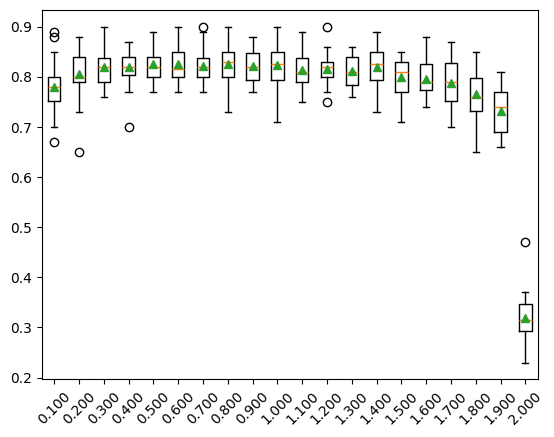

In [72]:
from numpy import arange
from matplotlib import pyplot


def get_daatset():
    X, y = make_classification(n_samples=1000 , n_informative=15 , n_redundant=5 , random_state=42 , n_features=20)
    return X , y

def get_model():
    models = {}

    for i in arange(0.1 , 2.1 , 0.1):
        key = "%.3f"%i
        models[key] = AdaBoostClassifier(learning_rate=i)
    return models

def evaluate_model(model , X , y):
    cv = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=3)

    n_scores = cross_val_score(model , X , y , scoring = "accuracy" , cv = cv , n_jobs= -1 , error_score="raise")

    return n_scores

X , y =  get_daatset()

models = get_model()

results , names = [] ,[]

for name, model in models.items():
    scores = evaluate_model(model , X ,y)

    results.append(scores)

    names.append(name)

    print(f"Model : {name} \n Mean is {mean(scores):.2f} and Standard deviation is {std(scores):.2f} \n\n")

pyplot.boxplot(results , labels = names , showmeans=True)
pyplot.xticks(rotation = 45)
pyplot.show()



In [81]:
from sklearn.model_selection import GridSearchCV

grid = dict()

X, y = make_classification(n_samples=1000 , n_informative=15 , n_redundant=5 , random_state=42 , n_features=20)

grid["n_estimators"] = [50 , 100 , 150 , 500]

grid["learning_rate"] = [0.0001 , 0.001 , 0.01 , 0.1 ,1.0]

cv = RepeatedStratifiedKFold(n_splits= 10 , n_repeats=3)

grid_search = GridSearchCV(estimator=model , param_grid=grid , n_jobs = -1 , cv =cv , scoring = "accuracy")

grid_result = grid_search.fit(X , y)

print(f"Best Score is {grid_result.best_score_} using {grid_result.best_params_}")

means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]

for mean , std , param in zip(means, stds ,params):
    print(f"Means is {mean}  , Standard Deviation is {std}  using {param} \n")

Best Score is 0.8413333333333334 using {'learning_rate': 0.1, 'n_estimators': 500}
Means is 0.6866666666666669  , Standard Deviation is 0.047069688288276935  using {'learning_rate': 0.0001, 'n_estimators': 50} 

Means is 0.6866666666666669  , Standard Deviation is 0.047069688288276935  using {'learning_rate': 0.0001, 'n_estimators': 100} 

Means is 0.6866666666666669  , Standard Deviation is 0.047069688288276935  using {'learning_rate': 0.0001, 'n_estimators': 150} 

Means is 0.6866666666666669  , Standard Deviation is 0.047069688288276935  using {'learning_rate': 0.0001, 'n_estimators': 500} 

Means is 0.6866666666666669  , Standard Deviation is 0.047069688288276935  using {'learning_rate': 0.001, 'n_estimators': 50} 

Means is 0.6876666666666669  , Standard Deviation is 0.047866713091899486  using {'learning_rate': 0.001, 'n_estimators': 100} 

Means is 0.6876666666666669  , Standard Deviation is 0.047866713091899486  using {'learning_rate': 0.001, 'n_estimators': 150} 

Means is 0.6